![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!ls

CONTRIBUTING.md
DS_Project_Presentation.pdf
LICENSE.md
README.md
dsc-phase1-project-template.ipynb
images
master
zippedData


In [3]:
import gzip
with gzip.open("zippedData/imdb.title.basics.csv.gz") as f:
    new_file = pd.read_csv(f)

In [4]:
new_file

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [5]:
with gzip.open('zippedData/imdb.title.ratings.csv.gz') as g:
    ratings_file = pd.read_csv(g)

In [6]:
ratings_file

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
ratings_file[ratings_file['tconst'] == 'tt9844256']

,tconst,averagerating,numvotes
73852,tt9844256,7.5,24


In [8]:
new_file[new_file['tconst'] == 'tt9844256']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
145600,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"


In [9]:
new_file[new_file['primary_title'] == 'Toy Story 3']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
104,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"


In [10]:
with gzip.open("zippedData/bom.movie_gross.csv.gz") as h:
    gross_file = pd.read_csv(h)

In [11]:
gross_file

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
new_file.set_index('tconst', inplace=True)

In [13]:
ratings_file.set_index('tconst', inplace=True)

In [14]:
big_df = pd.concat([new_file, ratings_file], join = 'inner', axis = 1)
big_df

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [15]:
big_df2 = new_file.join(ratings_file, how='inner', lsuffix='1')
big_df2

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [16]:
big_df.set_index('primary_title', inplace=True)

In [17]:
gross_file.set_index('title', inplace=True)

In [18]:
main_file = big_df.join(gross_file, how = 'inner')

In [19]:
main_file

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000,2015
"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,NaN,2014
10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000,2016
10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484,Anch.,203000.0,NaN,2012
1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301,KL,11000.0,NaN,2015
...,...,...,...,...,...,...,...,...,...,...
Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,2011,155.0,"Comedy,Drama",8.1,58912,Eros,3100000.0,NaN,2011
Zombeavers,Zombeavers,2014,77.0,"Action,Adventure,Comedy",4.8,14825,Free,14900.0,NaN,2015
Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",5.2,52396,Sony,80400000.0,89500000,2011
Zoolander 2,Zoolander 2,2016,101.0,Comedy,4.7,59914,Par.,28800000.0,27900000,2016


In [20]:
main_file[main_file['original_title'] == 'Toy Story 3']

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,BV,415000000.0,652000000,2010


In [21]:
main_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3027 entries, '71 to Zootopia
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   3027 non-null   object 
 1   start_year       3027 non-null   int64  
 2   runtime_minutes  2980 non-null   float64
 3   genres           3020 non-null   object 
 4   averagerating    3027 non-null   float64
 5   numvotes         3027 non-null   int64  
 6   studio           3024 non-null   object 
 7   domestic_gross   3005 non-null   float64
 8   foreign_gross    1832 non-null   object 
 9   year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 260.1+ KB


In [22]:
main_file.isnull().sum()

original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [23]:
main_file[main_file['studio'].isna() == True ]

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
Keith Lemon: The Film,Keith Lemon: The Film,2012,85.0,Comedy,2.6,3950,NaN,NaN,4000000,2012
Plot for Peace,Plot for Peace,2013,84.0,"Documentary,History,Thriller",6.7,128,NaN,7100.0,NaN,2014
Secret Superstar,Secret Superstar,2017,150.0,"Drama,Music",8.0,16563,NaN,NaN,122000000,2017


In [24]:
main_file = main_file.drop(['studio','start_year'], axis=1)

In [25]:
main_file.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,2980.000000,3027.000000,3.027000e+03,3.005000e+03,3027.000000
mean,107.217114,6.457582,6.170030e+04,3.064033e+07,2014.077635
std,20.073886,1.012277,1.255132e+05,6.671629e+07,2.442245
min,3.000000,1.600000,5.000000e+00,1.000000e+02,2010.000000
25%,94.000000,5.900000,2.117000e+03,1.390000e+05,2012.000000
50%,105.000000,6.600000,1.310900e+04,2.000000e+06,2014.000000
75%,118.000000,7.100000,6.276550e+04,3.250000e+07,2016.000000
max,272.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


In [26]:
# Here you run your code to explore the data
main_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3027 entries, '71 to Zootopia
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   3027 non-null   object 
 1   runtime_minutes  2980 non-null   float64
 2   genres           3020 non-null   object 
 3   averagerating    3027 non-null   float64
 4   numvotes         3027 non-null   int64  
 5   domestic_gross   3005 non-null   float64
 6   foreign_gross    1832 non-null   object 
 7   year             3027 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 212.8+ KB


In [27]:
main_file.isna().sum()

original_title        0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [28]:
main_file[main_file['genres'].isna() == True]

,original_title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
Going the Distance,Kazoku e,117.0,NaN,3.9,13,17800000.0,24200000,2010
I'm Still Here,I'm Still Here,60.0,NaN,7.1,14,409000.0,160000,2010
Joy,Hara,80.0,NaN,5.8,28,56500000.0,44700000,2015
Robin Hood,Robin Hood,NaN,NaN,7.6,5,105300000.0,216400000,2010
The Bounty Hunter,The Bounty Hunter,NaN,NaN,6.3,29,67099999.0,69300000,2010
The Intern,El pasante,65.0,NaN,5.5,22,75800000.0,118800000,2015
When the Bough Breaks,When the Bough Breaks,93.0,NaN,6.1,8,29700000.0,911000,2016


In [29]:
main_file['genres'].value_counts().index[0]

'Drama'

In [30]:
main_file['runtime_minutes'] = main_file['runtime_minutes'].fillna(main_file['runtime_minutes'].median())

In [31]:
main_file['genres'] = main_file['genres'].fillna(main_file['genres'].value_counts().index[0])

In [32]:
main_file[main_file['original_title'] == 'Hara']

,original_title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
Joy,Hara,80.0,Drama,5.8,28,56500000.0,44700000,2015


In [33]:
main_file.isna().sum()

original_title        0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [34]:
# main_file['domestic_gross'] = main_file['domestic_gross'].map(lambda x: x*(1000*1000000))

<AxesSubplot:ylabel='Frequency'>

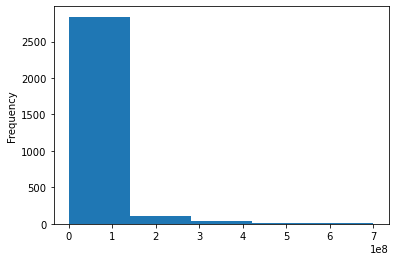

In [35]:
main_file['domestic_gross'].plot(kind = 'hist', bins= 5)

In [36]:
# main_file[main_file['title'].duplicated() == True]

In [37]:
main_file.reset_index(inplace=True)

In [38]:
main_file.rename(columns = {'index': 'title'}, inplace=True)

In [39]:
main_file.drop('original_title', inplace = True, axis=1)

In [40]:
main_file

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
0,'71,99.0,"Action,Drama,Thriller",7.2,46103,1300000.0,355000,2015
1,"1,000 Times Good Night",117.0,"Drama,War",7.1,6848,53900.0,NaN,2014
2,10 Cloverfield Lane,103.0,"Drama,Horror,Mystery",7.2,260383,72100000.0,38100000,2016
3,10 Years,100.0,"Comedy,Drama,Romance",6.1,22484,203000.0,NaN,2012
4,1001 Grams,93.0,Drama,6.3,1301,11000.0,NaN,2015
...,...,...,...,...,...,...,...,...
3022,Zindagi Na Milegi Dobara,155.0,"Comedy,Drama",8.1,58912,3100000.0,NaN,2011
3023,Zombeavers,77.0,"Action,Adventure,Comedy",4.8,14825,14900.0,NaN,2015
3024,Zookeeper,102.0,"Comedy,Family,Romance",5.2,52396,80400000.0,89500000,2011
3025,Zoolander 2,101.0,Comedy,4.7,59914,28800000.0,27900000,2016


In [41]:
subset = main_file.loc[main_file.duplicated(subset='title')].sort_values(by='numvotes')

In [42]:
main_file.loc[~main_file.duplicated(subset='title')].reset_index(drop=True)

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
0,'71,99.0,"Action,Drama,Thriller",7.2,46103,1300000.0,355000,2015
1,"1,000 Times Good Night",117.0,"Drama,War",7.1,6848,53900.0,NaN,2014
2,10 Cloverfield Lane,103.0,"Drama,Horror,Mystery",7.2,260383,72100000.0,38100000,2016
3,10 Years,100.0,"Comedy,Drama,Romance",6.1,22484,203000.0,NaN,2012
4,1001 Grams,93.0,Drama,6.3,1301,11000.0,NaN,2015
...,...,...,...,...,...,...,...,...
2593,Zindagi Na Milegi Dobara,155.0,"Comedy,Drama",8.1,58912,3100000.0,NaN,2011
2594,Zombeavers,77.0,"Action,Adventure,Comedy",4.8,14825,14900.0,NaN,2015
2595,Zookeeper,102.0,"Comedy,Family,Romance",5.2,52396,80400000.0,89500000,2011
2596,Zoolander 2,101.0,Comedy,4.7,59914,28800000.0,27900000,2016


In [43]:
subset2 = main_file.sort_values(by='numvotes')

In [44]:
for col in subset2.columns:
    print(col)
    print(subset2[col].duplicated().value_counts())
    print()

title
False    2598
True      429
Name: title, dtype: int64

runtime_minutes
True     2893
False     134
Name: runtime_minutes, dtype: int64

genres
True     2705
False     322
Name: genres, dtype: int64

averagerating
True     2956
False      71
Name: averagerating, dtype: int64

numvotes
False    2742
True      285
Name: numvotes, dtype: int64

domestic_gross
False    1523
True     1504
Name: domestic_gross, dtype: int64

foreign_gross
True     2020
False    1007
Name: foreign_gross, dtype: int64

year
True     3018
False       9
Name: year, dtype: int64



In [45]:
subset2.query("title == 'Abduction'")

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
113,Abduction,84.0,"Horror,Thriller",5.2,10,28100000.0,54000000,2011
114,Abduction,90.0,"Action,Comedy,Drama",3.0,60,28100000.0,54000000,2011
115,Abduction,106.0,"Action,Sci-Fi",6.1,1592,28100000.0,54000000,2011
112,Abduction,106.0,"Action,Mystery,Thriller",5.1,72552,28100000.0,54000000,2011


In [46]:
subset2.drop_duplicates(keep='last', subset='title')#.loc[subset['title'] == 'The Little Prince']

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
1463,Meerkats,40.0,Documentary,7.4,7,778000.0,482000,2012
2441,The Last Station,90.0,Documentary,7.6,10,6600000.0,6900000,2010
746,Eyes Wide Open,110.0,"Documentary,History",8.7,17,26300.0,250000,2010
183,Anchor Baby,95.0,"Drama,Thriller",7.0,25,15800.0,161000,2011
1798,Red,90.0,Drama,8.1,26,90400000.0,108600000,2010
...,...,...,...,...,...,...,...,...
2712,The Wolf of Wall Street,180.0,"Biography,Crime,Drama",8.2,1035358,116900000.0,275100000,2013
636,Django Unchained,165.0,"Drama,Western",8.4,1211405,162800000.0,262600000,2012
1112,Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,188000000.0,489400000,2014
2222,The Dark Knight Rises,164.0,"Action,Thriller",8.4,1387769,448100000.0,636800000,2012


In [47]:
subset2.drop_duplicates(keep='last')

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
1840,Robin Hood,105.0,Drama,7.6,5,105300000.0,216400000,2010
416,Buried,95.0,Thriller,6.0,5,1000000.0,18100000,2010
2008,Split,105.0,Crime,6.8,5,138300000.0,140200000,2017
134,After the Storm,105.0,Drama,8.0,5,272000.0,NaN,2017
2543,The Other Side of the Door,90.0,Drama,3.8,5,3000000.0,11300000,2016
...,...,...,...,...,...,...,...,...
2712,The Wolf of Wall Street,180.0,"Biography,Crime,Drama",8.2,1035358,116900000.0,275100000,2013
636,Django Unchained,165.0,"Drama,Western",8.4,1211405,162800000.0,262600000,2012
1112,Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,188000000.0,489400000,2014
2222,The Dark Knight Rises,164.0,"Action,Thriller",8.4,1387769,448100000.0,636800000,2012


In [48]:
main_file['year'].value_counts()

2015    414
2016    405
2011    357
2012    355
2014    350
2017    318
2013    314
2018    276
2010    238
Name: year, dtype: int64

In [49]:
main_file = main_file.sort_values(by='numvotes')

In [50]:
main_file = main_file.drop_duplicates(keep='last', subset='title')

In [51]:
main_file['title'].duplicated().value_counts()

False    2598
Name: title, dtype: int64

In [52]:
main_file[main_file['title'] == 'The Little Prince']

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
2459,The Little Prince,108.0,"Adventure,Animation,Drama",7.7,50015,1300000.0,96200000,2016


In [53]:
main_file.reset_index().sort_values(by='index').set_index('index')

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
index,,,,,,,,
0,'71,99.0,"Action,Drama,Thriller",7.2,46103,1300000.0,355000,2015
1,"1,000 Times Good Night",117.0,"Drama,War",7.1,6848,53900.0,NaN,2014
2,10 Cloverfield Lane,103.0,"Drama,Horror,Mystery",7.2,260383,72100000.0,38100000,2016
3,10 Years,100.0,"Comedy,Drama,Romance",6.1,22484,203000.0,NaN,2012
4,1001 Grams,93.0,Drama,6.3,1301,11000.0,NaN,2015
...,...,...,...,...,...,...,...,...
3022,Zindagi Na Milegi Dobara,155.0,"Comedy,Drama",8.1,58912,3100000.0,NaN,2011
3023,Zombeavers,77.0,"Action,Adventure,Comedy",4.8,14825,14900.0,NaN,2015
3024,Zookeeper,102.0,"Comedy,Family,Romance",5.2,52396,80400000.0,89500000,2011


In [54]:
main_file = main_file.sort_values('title').reset_index().drop('index', axis=1)

In [55]:
main_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2598 non-null   object 
 1   runtime_minutes  2598 non-null   float64
 2   genres           2598 non-null   object 
 3   averagerating    2598 non-null   float64
 4   numvotes         2598 non-null   int64  
 5   domestic_gross   2581 non-null   float64
 6   foreign_gross    1557 non-null   object 
 7   year             2598 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 162.5+ KB


In [56]:
main_file.isna().sum()

title                 0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
domestic_gross       17
foreign_gross      1041
year                  0
dtype: int64

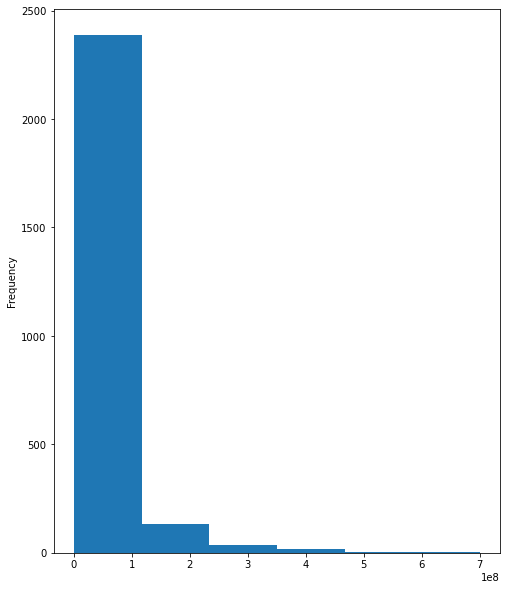

In [57]:
main_file['domestic_gross'].plot(figsize=(8,10), kind='hist', bins=6);

In [58]:
main_file['domestic_gross'] = main_file['domestic_gross'].fillna(main_file['domestic_gross'].median())

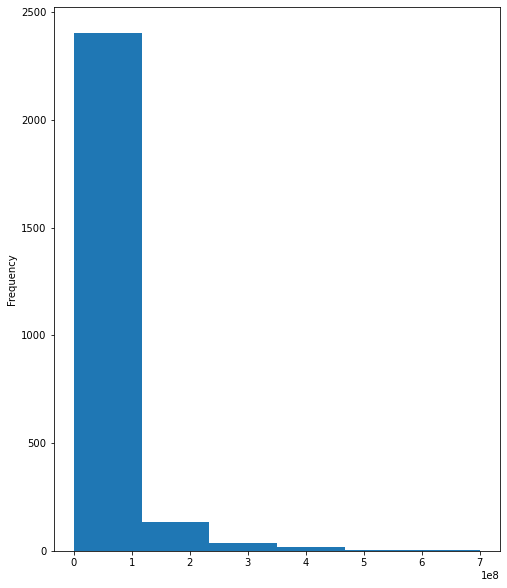

In [59]:
main_file['domestic_gross'].plot(figsize=(8,10), kind='hist', bins=6);

In [60]:
main_file['domestic_gross'].mean()

30799559.385681294

In [61]:
main_file[main_file['domestic_gross'] < 100000000]

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
0,'71,99.0,"Action,Drama,Thriller",7.2,46103,1300000.0,355000,2015
1,"1,000 Times Good Night",117.0,"Drama,War",7.1,6848,53900.0,NaN,2014
2,10 Cloverfield Lane,103.0,"Drama,Horror,Mystery",7.2,260383,72100000.0,38100000,2016
3,10 Years,100.0,"Comedy,Drama,Romance",6.1,22484,203000.0,NaN,2012
4,1001 Grams,93.0,Drama,6.3,1301,11000.0,NaN,2015
...,...,...,...,...,...,...,...,...
2592,Zero Motivation,97.0,"Comedy,Drama",7.3,3645,116000.0,NaN,2014
2593,Zindagi Na Milegi Dobara,155.0,"Comedy,Drama",8.1,58912,3100000.0,NaN,2011
2594,Zombeavers,77.0,"Action,Adventure,Comedy",4.8,14825,14900.0,NaN,2015
2595,Zookeeper,102.0,"Comedy,Family,Romance",5.2,52396,80400000.0,89500000,2011


In [62]:
main_file.groupby('genres')['domestic_gross'].sum()

genres
Action                        1.805450e+07
Action,Adventure              3.245000e+05
Action,Adventure,Animation    2.184660e+09
Action,Adventure,Biography    2.402290e+08
Action,Adventure,Comedy       3.172295e+09
                                  ...     
Romance,Sci-Fi,Thriller       6.250000e+07
Romance,Thriller              5.473000e+05
Sci-Fi                        7.800000e+04
Thriller                      2.534000e+05
Thriller,Western              2.110000e+04
Name: domestic_gross, Length: 296, dtype: float64

In [63]:
len(main_file[main_file['domestic_gross'] == 1300000])

26

In [64]:
main_file[main_file.title.str.contains('Avengers')]

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
223,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,459000000.0,946400000,2015
224,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,678800000.0,"1,369.5",2018


In [65]:
main_file[main_file['title'] == 'Zootopia']

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
2597,Zootopia,108.0,"Adventure,Animation,Comedy",8.0,383446,341300000.0,682500000,2016


In [66]:
subset=main_file.foreign_gross.replace(np.nan, '?')
subset

0          355000
1               ?
2        38100000
3               ?
4               ?
          ...    
2593            ?
2594            ?
2595     89500000
2596     27900000
2597    682500000
Name: foreign_gross, Length: 2598, dtype: object

In [67]:
subset = subset[subset.str.contains(',')]\
.map(lambda x: x.replace(',', '')).astype(float).map(lambda x: x*1000000)

In [68]:
subset

224     1.369500e+09
736     1.163000e+09
1030    1.019400e+09
1991    1.010000e+09
Name: foreign_gross, dtype: float64

In [69]:
float('1.000')

1.0

In [70]:
subset3 = main_file['foreign_gross'].replace(np.nan, '?')
subset3.isna().sum()
type(subset3)

pandas.core.series.Series

In [71]:
def str_replace(val):
    if ',' in val:
        return float(val.replace(',', ''))*1000000
    else:
        return val

In [72]:
subset5 = main_file.foreign_gross.replace(np.nan, '?').apply(str_replace)

In [73]:
subset6 = main_file.foreign_gross.replace(np.nan, '?').apply(str_replace)

In [74]:
subset6.iloc[1991]

1010000000.0

In [75]:
subset7 = subset6.replace('?', 1.0).apply(lambda x: float(x))

In [76]:
subset7.dtype

dtype('float64')

In [77]:
str_replace('1,035')

1035000000.0

In [78]:
str_replace('1,019.4')

1019400000.0

In [79]:
main_file.sort_values('title').reset_index().drop('index', axis=1).iloc[1463:1470]

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
1463,Paranormal Activity 4,88.0,"Horror,Mystery,Thriller",4.6,58408,53900000.0,88900000,2012
1464,Paranormal Activity: The Ghost Dimension,88.0,"Horror,Mystery,Thriller",4.6,22361,18300000.0,60600000,2015
1465,Paranormal Activity: The Marked Ones,84.0,"Horror,Mystery,Thriller",5.0,37147,32500000.0,58400000,2014
1466,Parental Guidance,105.0,"Comedy,Family",6.1,23711,77300000.0,42500000,2012
1467,Paris Can Wait,92.0,"Comedy,Drama,Romance",5.8,6416,5600000.0,NaN,2017
1468,Parker,118.0,"Action,Crime,Thriller",6.2,105529,17600000.0,28600000,2013
1469,Passion,102.0,"Drama,Mystery,Thriller",5.3,20153,92200.0,NaN,2013


In [80]:
main_file['foreign_gross'] = main_file.foreign_gross.replace(np.nan, '?').apply(str_replace)

In [81]:
main_file['foreign_gross'].iloc[1030]

1019400000.0

In [82]:
main_file['foreign_gross'] = main_file.foreign_gross.replace('?', 1.0).apply(lambda x: float(x))

In [83]:
main_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2598 non-null   object 
 1   runtime_minutes  2598 non-null   float64
 2   genres           2598 non-null   object 
 3   averagerating    2598 non-null   float64
 4   numvotes         2598 non-null   int64  
 5   domestic_gross   2598 non-null   float64
 6   foreign_gross    2598 non-null   float64
 7   year             2598 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 162.5+ KB


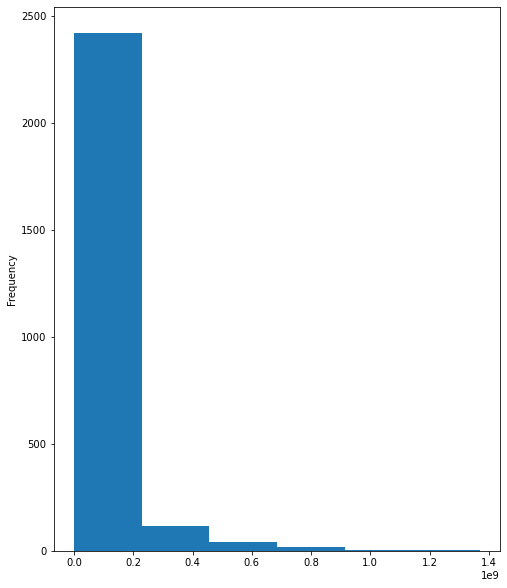

In [84]:
main_file['foreign_gross'].plot(figsize=(8,10), kind='hist', bins=6);

22100000.0
84009885.7347463
0    1200000.0
dtype: float64
151773749.26147085


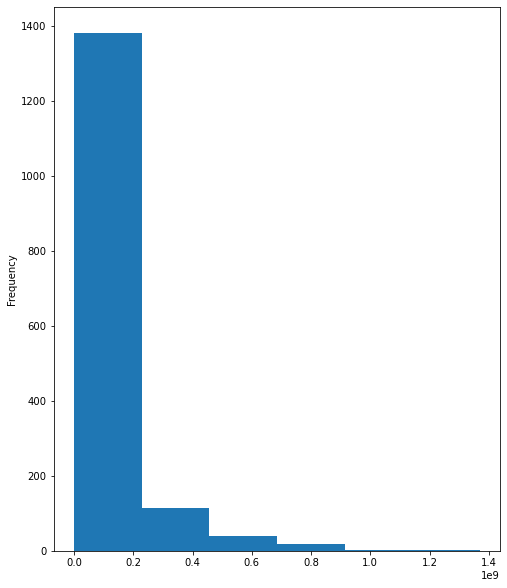

In [85]:
subset8 = main_file.foreign_gross.replace(1.0, np.nan).dropna()
subset8.plot(figsize=(8,10), kind='hist', bins=6);
print(subset8.median())
print(subset8.mean())
print(subset8.mode())
print(subset8.std())

In [86]:
subset8

0          355000.0
2        38100000.0
5        10900000.0
6         5700000.0
7        21600000.0
           ...     
2589     20300000.0
2591     37100000.0
2595     89500000.0
2596     27900000.0
2597    682500000.0
Name: foreign_gross, Length: 1557, dtype: float64

2100000.0
51189180.94264819
0    2100000.0
dtype: float64
124150757.47500187


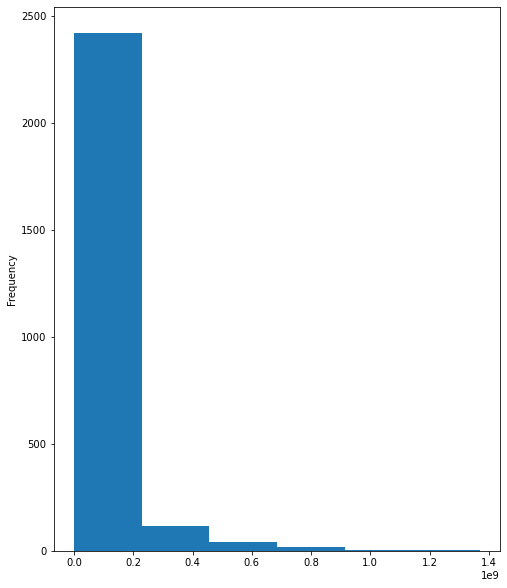

In [87]:
subset9 = main_file.foreign_gross.replace(1.0, np.nan).fillna(main_file.foreign_gross.median())
subset9.plot(figsize=(8,10), kind='hist', bins=6);
print(subset9.median())
print(subset9.mean())
print(subset9.mode())
print(subset9.std())

In [88]:
subset9

0          355000.0
1         2100000.0
2        38100000.0
3         2100000.0
4         2100000.0
           ...     
2593      2100000.0
2594      2100000.0
2595     89500000.0
2596     27900000.0
2597    682500000.0
Name: foreign_gross, Length: 2598, dtype: float64

In [89]:
subset10 = main_file.foreign_gross.replace(1.0, np.nan)
print(subset10.median(), ',', subset8.median())
print(subset10.mean(), ',', subset8.mean())
print(subset10.mode(), ',', subset8.mode())
print(subset10.std(), ',', subset8.std())

22100000.0 , 22100000.0
84009885.7347463 , 84009885.7347463
0    1200000.0
dtype: float64 , 0    1200000.0
dtype: float64
151773749.26147085 , 151773749.26147085


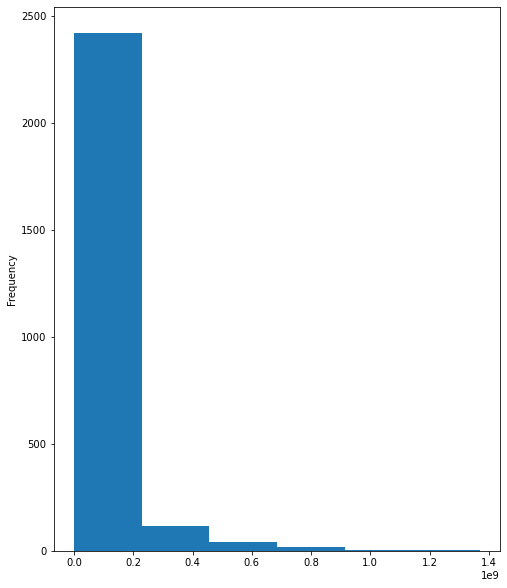

In [90]:
main_file['foreign_gross'].replace(1.0, main_file.foreign_gross.median()).plot(figsize=(8,10), kind='hist', bins=6);


In [91]:
main_file['foreign_gross'] = main_file['foreign_gross'].replace(1.0, main_file.foreign_gross.median())
print(main_file['foreign_gross'].median())
print(main_file['foreign_gross'].mean())
print(main_file['foreign_gross'].mode())
print(main_file['foreign_gross'].std())
print()
print(subset9.median())
print(subset9.mean())
print(subset9.mode())
print(subset9.std())

2100000.0
51189180.94264819
0    2100000.0
dtype: float64
124150757.47500187

2100000.0
51189180.94264819
0    2100000.0
dtype: float64
124150757.47500187


In [92]:
main_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2598 non-null   object 
 1   runtime_minutes  2598 non-null   float64
 2   genres           2598 non-null   object 
 3   averagerating    2598 non-null   float64
 4   numvotes         2598 non-null   int64  
 5   domestic_gross   2598 non-null   float64
 6   foreign_gross    2598 non-null   float64
 7   year             2598 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 162.5+ KB


In [93]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [94]:
main_file.sort_values(by='foreign_gross').head(30)

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
426,Chasing Mavericks,116.0,"Biography,Drama,Sport",7.2,28994,6000000.0,600.0,2012
452,Client 9: The Rise and Fall of Eliot Spitzer,117.0,Documentary,7.4,2097,189000.0,3500.0,2010
1984,The Extra Man,108.0,Comedy,5.9,4580,453000.0,4500.0,2010
220,Aurora,181.0,Drama,6.7,1398,5700.0,5100.0,2011
1043,Karthik Calling Karthik,135.0,"Drama,Mystery,Thriller",7.0,9257,286000.0,7100.0,2010
2407,Troublemakers: The Story of Land Art,72.0,"Biography,Documentary,History",6.5,108,29500.0,9100.0,2016
447,Cirkus Columbia,113.0,"Comedy,Drama,Romance",7.3,2336,3500.0,9500.0,2012
1184,Love Thy Nature,76.0,Documentary,6.9,112,41100.0,11800.0,2015
1404,Nostalgia for the Light,90.0,Documentary,7.6,4242,164000.0,13700.0,2011
1363,Mysteries of Lisbon,272.0,"Drama,Mystery,Romance",7.5,2928,111000.0,14900.0,2011


In [95]:
main_file.sort_values(by='foreign_gross', ascending=False).head(20)

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
224,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,678800000.0,1369500000.0,2018
736,Furious 7,137.0,"Action,Crime,Thriller",7.2,335074,353000000.0,1163000000.0,2015
1030,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,652300000.0,1019400000.0,2015
1991,The Fate of the Furious,136.0,"Action,Crime,Thriller",6.7,179774,226000000.0,1010000000.0,2017
223,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,459000000.0,946400000.0,2015
1031,Jurassic World: Fallen Kingdom,128.0,"Action,Adventure,Sci-Fi",6.2,219125,417700000.0,891800000.0,2018
733,Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998,400700000.0,875700000.0,2013
2550,Wolf Warrior 2,123.0,"Action,Drama,Thriller",6.2,5684,2700000.0,867600000.0,2017
2397,Transformers: Age of Extinction,165.0,"Action,Adventure,Sci-Fi",5.7,283486,245400000.0,858600000.0,2014
1285,Minions,91.0,"Adventure,Animation,Comedy",6.4,193917,336000000.0,823400000.0,2015


In [96]:
to_drop = main_file[main_file['domestic_gross'] < 1000000] .sort_values(by='domestic_gross').index

In [97]:
main_file[(main_file['domestic_gross'] < 1000000) & (main_file['foreign_gross'] != 2100000.0)].sort_values(by='domestic_gross')#.index

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
192,Apartment 143,80.0,"Horror,Thriller",5.1,10575,400.0,426000.0,2012
163,Amityville: The Awakening,85.0,"Horror,Thriller",4.9,10930,700.0,7700000.0,2017
991,Jackpot,86.0,"Action,Comedy,Crime",6.6,2941,800.0,1100000.0,2014
1059,Khumba,85.0,"Adventure,Animation,Family",5.7,4984,1000.0,27200000.0,2013
1242,Marrowbone,110.0,"Drama,Horror,Thriller",6.6,16579,1400.0,12300000.0,2018
...,...,...,...,...,...,...,...,...
2234,The Red Turtle,80.0,"Animation,Fantasy",7.5,25061,922000.0,5700000.0,2017
1873,The Babadook,94.0,"Drama,Horror",6.8,171411,964000.0,9300000.0,2014
1108,Last Flag Flying,125.0,"Comedy,Drama,War",6.9,18927,965000.0,904000.0,2017
1879,The Beaver,91.0,Drama,6.7,45173,971000.0,6300000.0,2011


In [98]:
subset11 = main_file.drop(to_drop)
to_drop2 = subset11[subset11['foreign_gross'] < 1000000].sort_values(by='foreign_gross').index
subset12 = subset11.drop(to_drop2)
subset12.sort_values(by='foreign_gross').head(30)

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
530,Desierto,88.0,"Drama,Thriller",6.0,8235,2000000.0,1000000.0,2016
249,Barbershop: The Next Cut,111.0,"Comedy,Drama",5.9,13306,54000000.0,1000000.0,2016
1604,"Roman J. Israel, Esq.",122.0,"Crime,Drama,Thriller",6.4,23632,12000000.0,1100000.0,2017
1553,Ramona and Beezus,103.0,"Adventure,Comedy,Family",6.6,16086,26200000.0,1100000.0,2010
2247,The Runaways,106.0,"Biography,Drama,Music",6.6,43792,3600000.0,1100000.0,2010
1439,Our Family Wedding,103.0,"Comedy,Romance",4.9,6417,20300000.0,1200000.0,2010
1777,Strange Magic,99.0,"Adventure,Animation,Comedy",5.8,9292,12400000.0,1200000.0,2015
882,Housefull,144.0,Comedy,5.5,11089,1200000.0,1200000.0,2010
2559,Words and Pictures,111.0,"Comedy,Drama,Romance",6.6,9280,2200000.0,1200000.0,2014
1258,"McFarland, USA",129.0,"Biography,Drama,Sport",7.4,31735,44500000.0,1200000.0,2015


In [99]:
main_file = main_file.drop(to_drop)
main_file = main_file.drop(main_file[main_file['foreign_gross'] < 1000000].sort_values(by='foreign_gross').index)
main_file.sort_values(by='foreign_gross').head(30)

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
530,Desierto,88.0,"Drama,Thriller",6.0,8235,2000000.0,1000000.0,2016
249,Barbershop: The Next Cut,111.0,"Comedy,Drama",5.9,13306,54000000.0,1000000.0,2016
1604,"Roman J. Israel, Esq.",122.0,"Crime,Drama,Thriller",6.4,23632,12000000.0,1100000.0,2017
1553,Ramona and Beezus,103.0,"Adventure,Comedy,Family",6.6,16086,26200000.0,1100000.0,2010
2247,The Runaways,106.0,"Biography,Drama,Music",6.6,43792,3600000.0,1100000.0,2010
1439,Our Family Wedding,103.0,"Comedy,Romance",4.9,6417,20300000.0,1200000.0,2010
1777,Strange Magic,99.0,"Adventure,Animation,Comedy",5.8,9292,12400000.0,1200000.0,2015
882,Housefull,144.0,Comedy,5.5,11089,1200000.0,1200000.0,2010
2559,Words and Pictures,111.0,"Comedy,Drama,Romance",6.6,9280,2200000.0,1200000.0,2014
1258,"McFarland, USA",129.0,"Biography,Drama,Sport",7.4,31735,44500000.0,1200000.0,2015


In [100]:
main_file = main_file.reset_index().drop('index', axis=1)
main_file

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
0,10 Cloverfield Lane,103.0,"Drama,Horror,Mystery",7.2,260383,72100000.0,38100000.0,2016
1,102 Not Out,102.0,"Comedy,Drama",7.5,4802,1300000.0,10900000.0,2018
2,12 Strong,130.0,"Action,Drama,History",6.6,50155,45800000.0,21600000.0,2018
3,12 Years a Slave,134.0,"Biography,Drama,History",8.1,577301,56700000.0,131100000.0,2013
4,127 Hours,94.0,"Adventure,Biography,Drama",7.6,323949,18300000.0,42400000.0,2010
...,...,...,...,...,...,...,...,...
1416,Zero Dark Thirty,157.0,"Drama,Thriller",7.4,251072,95700000.0,37100000.0,2012
1417,Zindagi Na Milegi Dobara,155.0,"Comedy,Drama",8.1,58912,3100000.0,2100000.0,2011
1418,Zookeeper,102.0,"Comedy,Family,Romance",5.2,52396,80400000.0,89500000.0,2011
1419,Zoolander 2,101.0,Comedy,4.7,59914,28800000.0,27900000.0,2016


In [101]:
main_file.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,1421.0,1421.0,1421.0,1421.0,1421.0,1421.0
mean,110.7,6.6,121645.0,55627867.7,88200211.1,2014.0
std,18.9,0.9,162639.2,83617477.9,156965969.4,2.5
min,40.0,1.6,10.0,1000000.0,1000000.0,2010.0
25%,97.0,6.0,24671.0,4600000.0,3300000.0,2012.0
50%,107.0,6.6,66595.0,26000000.0,23400000.0,2014.0
75%,121.0,7.2,145281.0,67300000.0,92000000.0,2016.0
max,189.0,8.8,1841066.0,700100000.0,1369500000.0,2018.0


,runtime_minutes,numvotes,domestic_gross,foreign_gross,year
averagerating,,,,,
3.9,145.0,7136,1400000.0,25500000.0,2017
4.1,103.0,137734,131800000.0,187900000.0,2010
4.2,251.0,55392,20200000.0,44500000.0,4029
4.3,278.0,256398,151500000.0,261600000.0,6037
4.4,384.0,142887,136400000.0,128400000.0,8053
4.5,90.0,29997,45900000.0,15000000.0,2017
4.6,181.0,38152,6600000.0,16600000.0,4030
4.7,231.0,21194,4900000.0,4200000.0,4027
4.8,100.0,181687,60500000.0,183300000.0,2013





## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [102]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

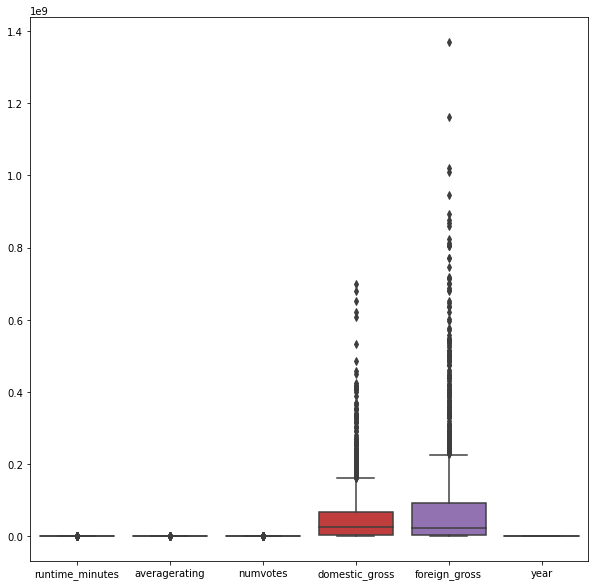

In [103]:
# Here you run your code to model the data
plt.figure(figsize=(10,10))
sns.boxplot(data=main_file);

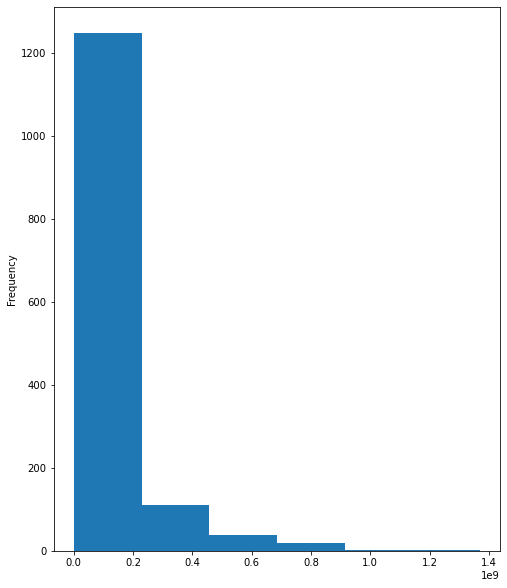

In [104]:
main_file['foreign_gross'].plot(figsize=(8,10), kind='hist', bins=6);

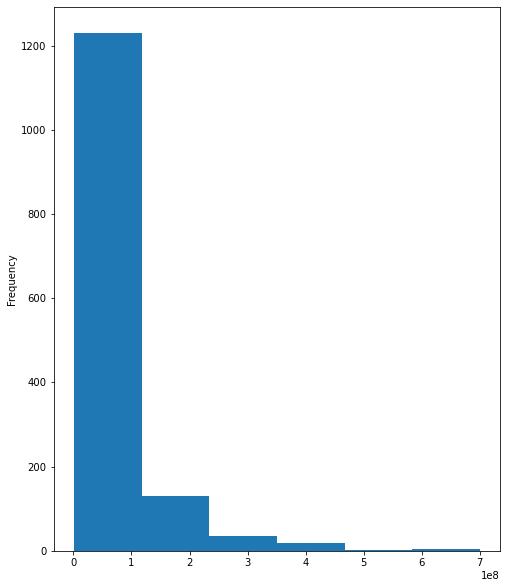

In [105]:
main_file['domestic_gross'].plot(figsize=(8,10), kind='hist', bins=6);

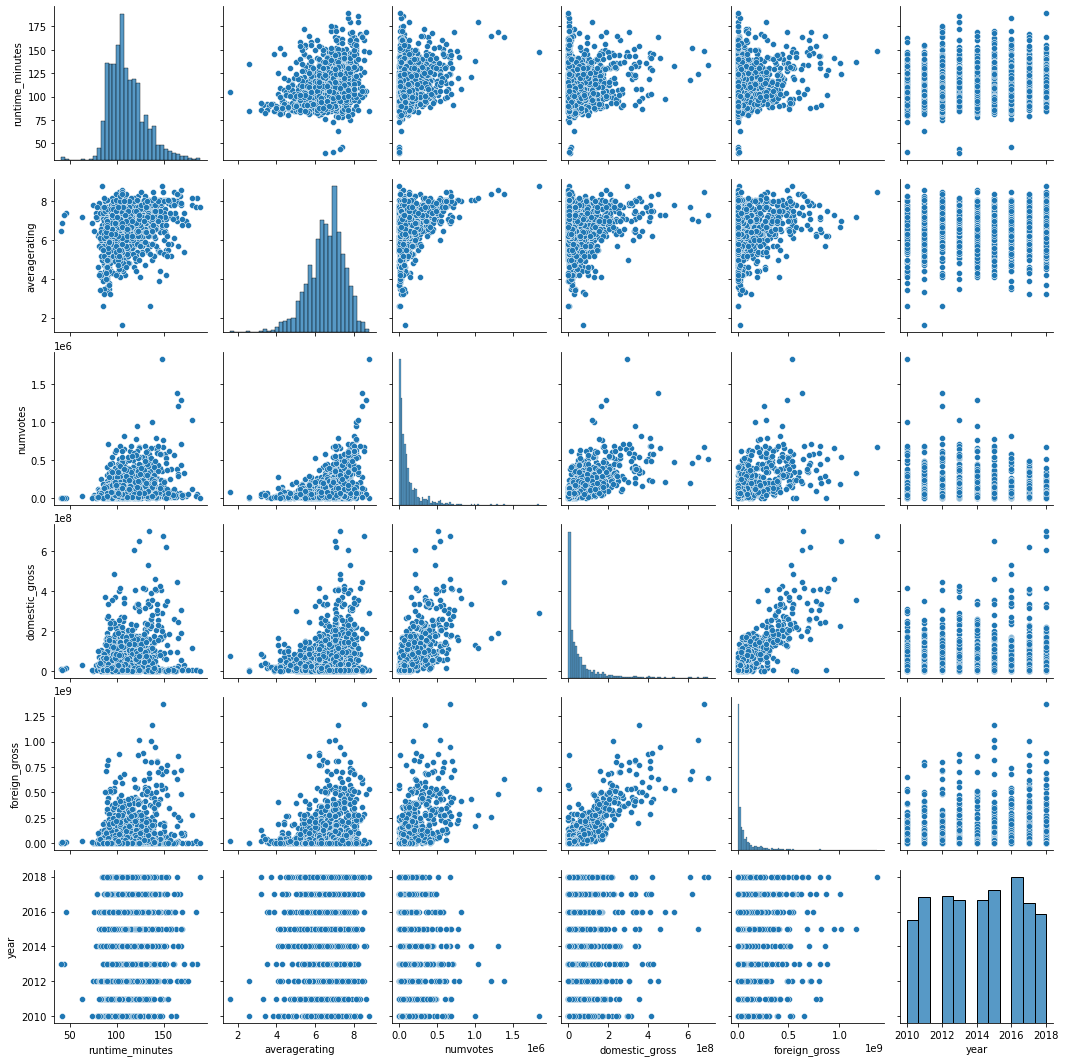

In [106]:
sns.pairplot(data=main_file);

In [159]:
top_genres = main_file.groupby(main_file.genres)['genres'].count().sort_values(ascending=False).head(20)
top_domestic_grossing = main_file.groupby(main_file.genres)['domestic_gross'].sum().sort_values(ascending=False).head(20)
top_foreign_grossing = main_file.groupby(main_file.genres)['foreign_gross'].sum().sort_values(ascending=False).head(20)

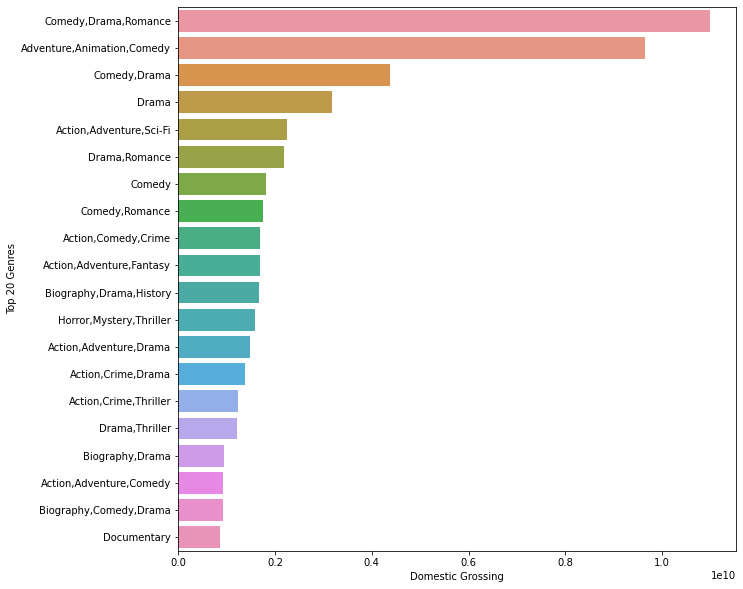

In [148]:
plt.figure(figsize=(10,10)) #setting the plot size

ax = sns.barplot(x= top_domestic_grossing, y=top_genres.index)
ax.set(xlabel = 'Domestic Grossing')
ax.set(ylabel = 'Top 20 Genres');

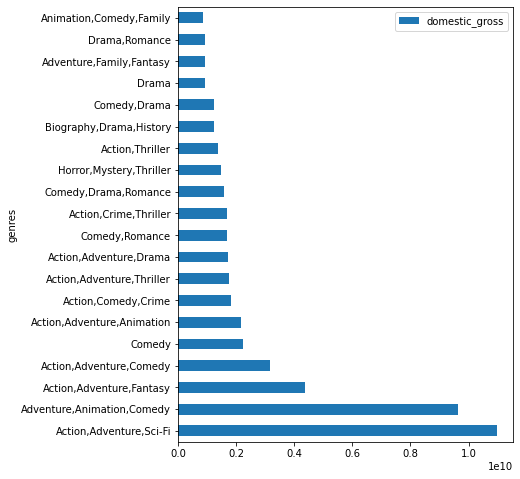

In [164]:
top_domestic_grossing.to_frame().plot(figsize=(6,8), kind='barh');

In [150]:
top_genres

genres
Comedy,Drama,Romance          72
Adventure,Animation,Comedy    69
Comedy,Drama                  52
Drama                         50
Action,Adventure,Sci-Fi       46
Drama,Romance                 45
Comedy                        45
Comedy,Romance                35
Action,Comedy,Crime           31
Action,Adventure,Fantasy      30
Biography,Drama,History       30
Horror,Mystery,Thriller       29
Action,Adventure,Drama        26
Action,Crime,Drama            26
Action,Crime,Thriller         25
Drama,Thriller                23
Biography,Drama               23
Action,Adventure,Comedy       22
Biography,Comedy,Drama        21
Documentary                   20
Name: genres, dtype: int64

In [136]:
main_file[main_file.genres == 'Action']

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
1167,The Man with the Iron Fists,95.0,Action,5.4,58185,15600000.0,4099999.0,2012


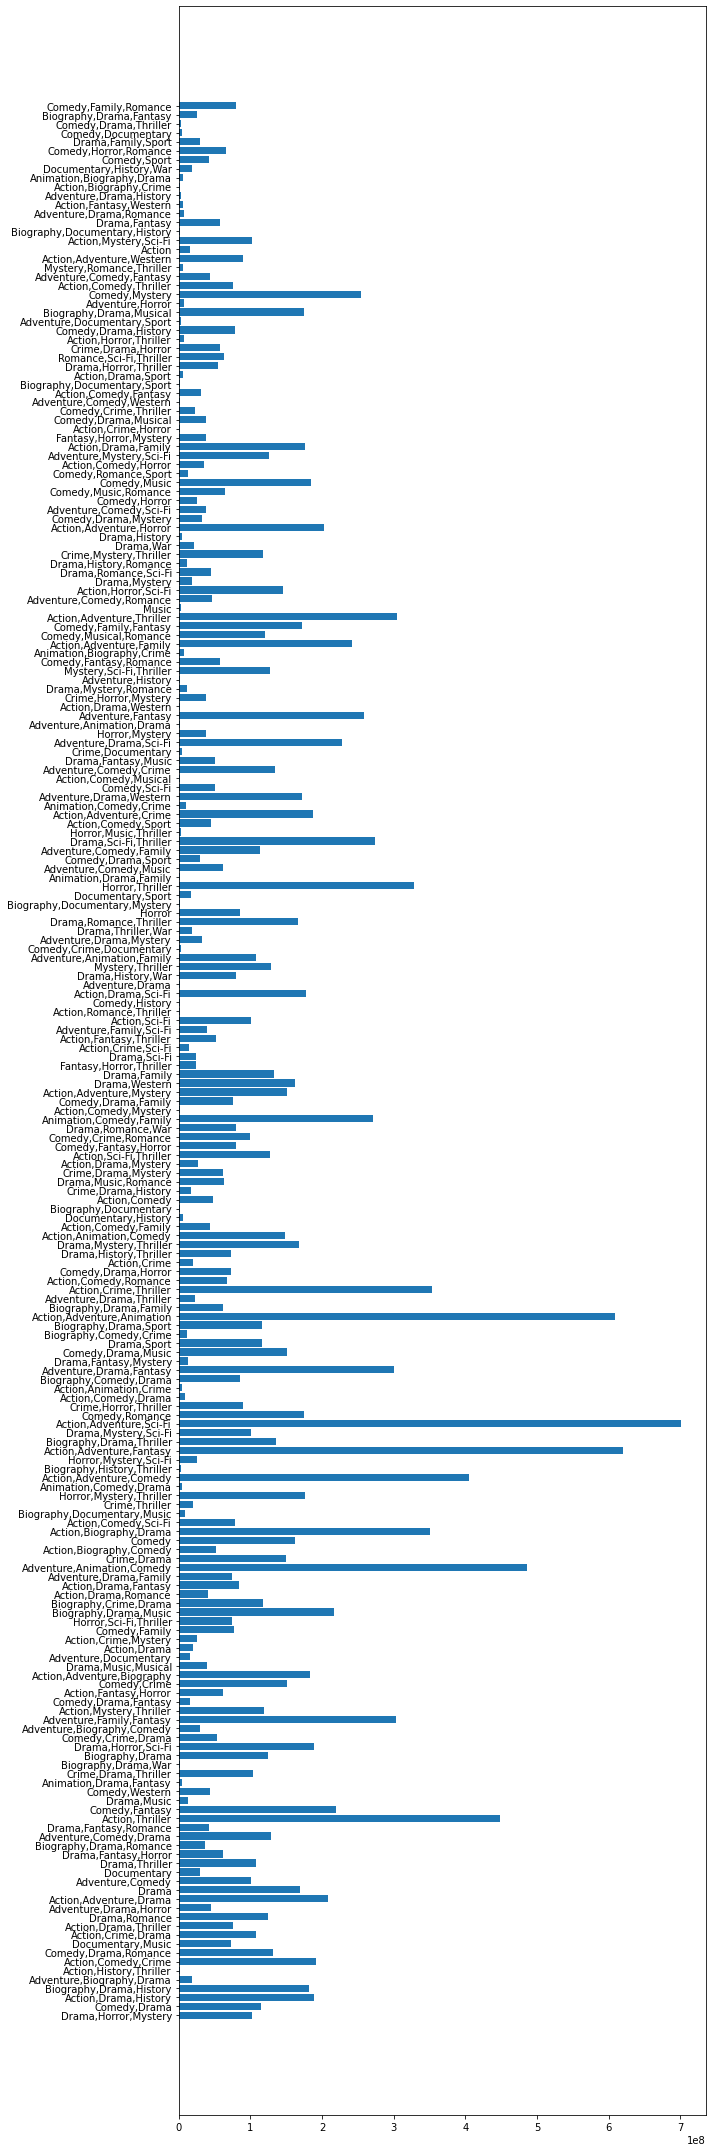

In [121]:
fig,ax = plt.subplots(figsize=(10,30))

ax.barh(main_file.genres, main_file.domestic_gross)
plt.tight_layout()

(array([  1.,   2.,   8.,  30.,  73., 213., 400., 402., 243.,  49.]),
 array([1.6 , 2.32, 3.04, 3.76, 4.48, 5.2 , 5.92, 6.64, 7.36, 8.08, 8.8 ]),
 <BarContainer object of 10 artists>)

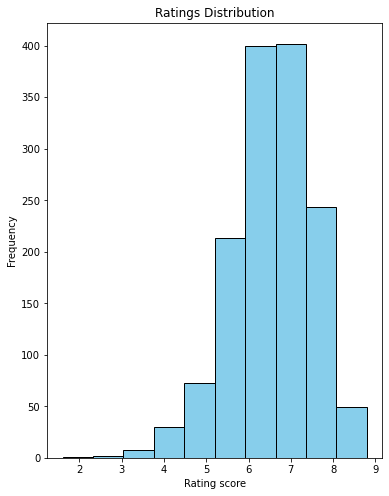

In [130]:
plt.figure(figsize=(6,8))
plt.title("Ratings Distribution") #setting the title of the plot
plt.xlabel('Rating score') # setting the x label of the plot
plt.ylabel('Frequency') # setting the y label of the plot
plt.hist(main_file['averagerating'], color="skyblue", edgecolor='black')

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***